In [3]:
library(bio3d)

In [24]:
pdb <- read.pdb("4q21")

  Note: Accessing on-line PDB file
  HEADER    ONCOGENE PROTEIN                        25-SEP-91   4Q21               


In [25]:
pdb


 Call:  read.pdb(file = "4q21")

   Total Models#: 1
     Total Atoms#: 1447,  XYZs#: 4341  Chains#: 1  (values: A)

     Protein Atoms#: 1340  (residues/Calpha atoms#: 168)
     Nucleic acid Atoms#: 0  (residues/phosphate atoms#: 0)

     Non-protein/nucleic Atoms#: 107  (residues: 80)
     Non-protein/nucleic resid values: [ GDP (1), HOH (78), MG (1) ]

   Protein sequence:
      MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAG
      QEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHQYREQIKRVKDSDDVPMVLVGNKCDL
      AARTVESRQAQDLARSYGIPYIETSAKTRQGVEDAFYTLVREIRQHKL

+ attr: atom, helix, sheet, seqres, xyz,
        calpha, remark, call

In [26]:
head(pdb$atom)

,type,eleno,elety,alt,resid,chain,resno,insert,x,y,z,o,b,segid,elesy,charge
1,ATOM,1,N,NA,MET,A,1,NA,64.08,50.529,32.509,1,28.66,NA,N,NA
2,ATOM,2,CA,NA,MET,A,1,NA,64.044,51.615,33.423,1,29.19,NA,C,NA
3,ATOM,3,C,NA,MET,A,1,NA,63.722,52.849,32.671,1,30.27,NA,C,NA
4,ATOM,4,O,NA,MET,A,1,NA,64.359,53.119,31.662,1,34.93,NA,O,NA
5,ATOM,5,CB,NA,MET,A,1,NA,65.373,51.805,34.158,1,28.49,NA,C,NA
6,ATOM,6,CG,NA,MET,A,1,NA,65.122,52.78,35.269,1,32.18,NA,C,NA


In [27]:
# Print $atom data for the first two atoms
pdb$atom[1:2, ]

,type,eleno,elety,alt,resid,chain,resno,insert,x,y,z,o,b,segid,elesy,charge
1,ATOM,1,N,NA,MET,A,1,NA,64.08,50.529,32.509,1,28.66,NA,N,NA
2,ATOM,2,CA,NA,MET,A,1,NA,64.044,51.615,33.423,1,29.19,NA,C,NA


In [28]:
# Print a subset of $atom data for the first two atoms
pdb$atom[1:2, c("eleno", "elety", "x","y","z")]

,eleno,elety,x,y,z
1,1,N,64.08,50.529,32.509
2,2,CA,64.044,51.615,33.423


In [29]:
# Note that individual $atom records can also be accessed like this
pdb$atom$elety[1:2]

[1] "N"  "CA"

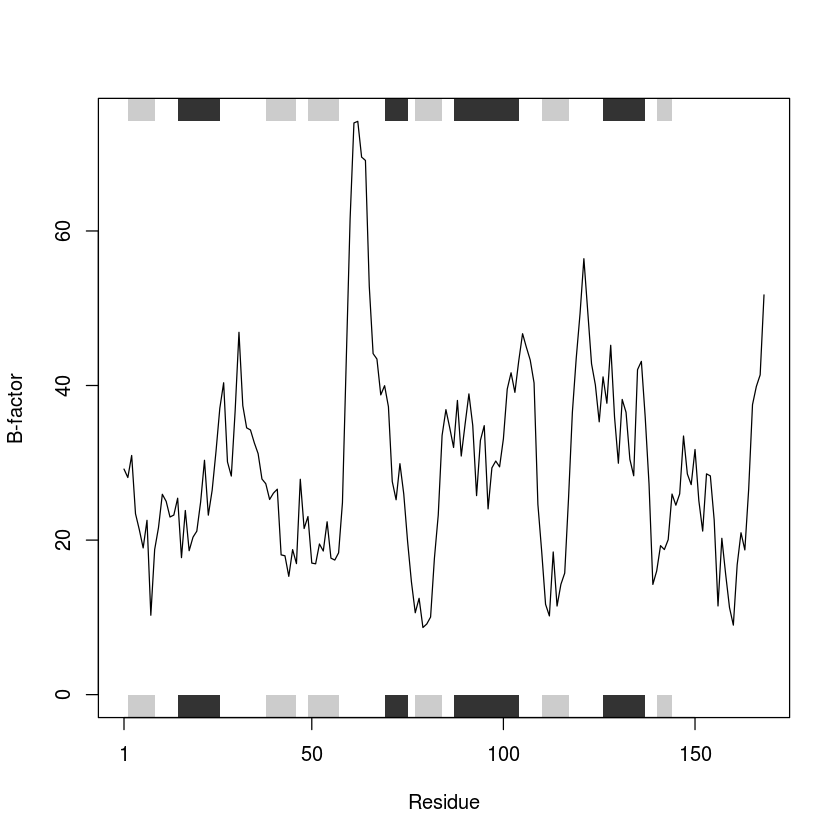

In [31]:
# Which allows us to do the following (see Figure 1.)
plot.bio3d(pdb$atom$b[pdb$calpha], sse=pdb, typ="l", ylab="B-factor")

In [32]:
# Print a summary of the coordinate data in $xyz
pdb$xyz

64.08,50.529,32.509,64.044,51.615,33.423,63.722,52.849,32.671,64.359,53.119,31.662,65.373,51.805,34.158,65.122,52.78,35.269,66.566,53.062,36.299,67.709,53.712,35.063,62.711,53.578,33.093,62.439,54.794,32.359,62.987,56.044,33.034,63.028,56.168,34.265,60.97,54.986,32.099,60.37,53.78,31.646,60.834,56.082,31.057,63.473,56.978,32.225,63.968,58.232,32.801,63.034,59.396,32.434,62.555,59.492,31.309,65.45,58.516,32.51,66.164,58.803,33.831,67.317,59.756,33.703,68.149,59.717,32.8,67.324,60.637,34.676,62.736,60.251,33.384,61.817,61.333,33.161,62.492,62.578,33.675,62.942,62.581,34.828,60.524,61.126,33.962,59.64,60,33.541,58.625,60.213,32.614,59.718,58.75,34.137,57.776,59.186,32.209,58.878,57.707,33.754,57.892,57.938,32.803,56.999,56.963,32.472,62.654,63.574,32.804,63.343,64.814,33.163,62.328,65.837,33.628,61.501,66.235,32.804,63.994,65.335,31.9,65.269,66.127,32.133,65.896,66.528,30.824,67.407,66.627,30.929,68.009,67.109,29.676,62.263,66.117,34.955,61.321,67.068,35.557,62.005,68.43,35.889,63.149,68.47,36.346,60.68,66.524,36.868,60.525,65.013,36.925,59.698,64.639,38.132,59.743,64.607,35.722,61.262,69.537,35.872,61.816,70.843,36.298,60.927,71.423,37.418,59.692,71.427,37.325,61.991,71.823,35.107,62.765,73.079,35.499,62.65,71.132,33.898,61.498,71.813,38.555,60.679,72.367,39.654,60.727,73.872,39.64,61.809,74.366,39.868,61.139,71.856,41.009,60.078,72.167,42.033,61.27,70.34,40.968,59.634,74.564,39.156,59.571,76.046,39.028,58.623,76.689,40.018,57.714,76.052,40.508,59.235,76.62,37.635,60.09,76.086,36.483,57.771,76.459,37.309,58.756,78.003,40.2,57.884,78.74,41.117,58.619,79.896,41.759,59.85,79.904,41.755,57.89,80.858,42.332,58.552,81.987,42.956,59.569,81.503,43.944,59.455,80.387,44.365,57.549,82.864,43.658,60.595,82.278,44.269,61.571,81.785,45.217,60.901,81.722,46.589,59.987,82.469,46.761,61.304,80.86,47.568,60.642,80.873,48.888,59.436,79.929,49.144,59.173,79.6,50.308,58.803,79.406,48.055,57.641,78.485,47.99,57.879,77.071,48.453,56.968,76.4,48.972,57.058,78.372,46.614,56.696,79.736,46.097,57.997,77.618,45.697,59.048,76.535,48.226,59.206,75.188,48.745,59.888,74.224,47.799,59.987,73.056,48.13,60.435,74.74,46.688,61.144,73.95,45.708,62.238,73.046,46.298,62.233,71.828,46.107,61.698,74.849,44.631,60.618,75.791,44.111,61.014,76.562,42.857,62.053,77.627,43.13,61.65,78.392,44.338,63.187,73.662,47.013,64.267,72.923,47.617,63.734,71.953,48.649,64.057,70.779,48.535,65.406,73.822,48.104,65.781,74.691,47.033,62.802,72.392,49.547,62.267,71.492,50.525,61.513,70.292,49.949,61.726,69.133,50.375,61.496,72.179,51.614,60.589,70.585,49.021,59.85,69.572,48.299,60.792,68.554,47.726,60.665,67.346,47.921,59.161,70.174,47.104,57.789,70.641,47.431,57.24,71.249,46.16,56.93,69.454,47.885,61.736,69.064,46.954,62.712,68.222,46.31,63.584,67.428,47.268,63.831,66.271,46.953,63.549,69.015,45.313,62.667,69.668,44.439,64.527,68.091,44.566,64.037,68.023,48.436,64.894,67.298,49.352,64.157,66.159,49.98,64.736,65.145,50.343,65.527,68.123,50.455,66.483,69.094,49.847,66.322,67.18,51.311,67.28,68.418,48.754,62.865,66.386,50.174,61.944,65.446,50.785,61.781,64.174,49.975,61.795,63.057,50.52,60.592,66.139,50.919,60.426,66.826,52.276,60.194,65.829,53.387,60.193,64.628,53.185,59.929,66.331,54.568,61.517,64.355,48.667,61.394,63.224,47.762,62.713,62.482,47.722,62.8,61.305,47.996,61.063,63.738,46.366,61.098,62.612,45.351,59.734,62.009,45.142,61.609,63.124,44.029,63.769,63.236,47.478,65.128,62.744,47.373,65.592,62.057,48.654,65.955,60.905,48.618,66.124,63.885,47.015,66.022,64.365,45.57,67.551,63.499,47.348,65.792,63.216,44.629,65.536,62.741,49.797,66.101,62.201,51.012,65.183,62.076,52.186,65.561,61.701,53.282,67.3,63.014,51.417,68.317,63.009,50.276,69.388,64.044,50.546,69.253,64.787,51.545,70.418,64.109,49.676,63.97,62.403,52.005,63.098,62.153,53.1,63.449,62.909,54.361,63.418,62.31,55.41,63.025,60.627,53.407,62.805,59.759,52.169,63.525,58.775,51.961,61.821,60.108,51.315,63.777,64.185,54.24,64.022,65.084,55.356,63.627,66.507,54.954,63.811,66.905,53.83,65.426,64.951,56.063,66.662,64.949,55.16,67.338,66.1

In [33]:
# Examine the row and column dimensions
dim(pdb$xyz)

[1]    1 4341

In [37]:
# indices at which the superposition should be based
a.ind <- atom.select(a, chain="A", resno=87:103, elety="CA")
b.ind <- atom.select(b, chain="A", resno=93:109, elety="CA")

# perform superposition
xyz <- fit.xyz(fixed=a$xyz, mobile=b$xyz,
               fixed.inds=a.ind$xyz,
               mobile.inds=b.ind$xyz)

# write coordinates to file
write.pdb(b, xyz=xyz, file="4LHY-at-4Q21.pdb")

In [38]:
# Read multi-model PDB file
pdb <- read.pdb("1l2y", multi=TRUE)

  Note: Accessing on-line PDB file
  PDB has multiple END/ENDMDL records 
  multi=TRUE: 'read.dcd/read.ncdf' will be quicker! 
  HEADER    DE NOVO PROTEIN                         25-FEB-02   1L2Y               


In [39]:
# The xyz component contains 20 frames
pdb$xyz

-8.901,4.127,-0.555,-8.608,3.135,-1.618,-7.117,2.964,-1.897,-6.634,1.849,-1.758,-9.437,3.396,-2.889,-10.915,3.13,-2.611,-11.269,2.7,-1.524,-11.806,3.406,-3.543,-8.33,3.957,0.261,-8.74,5.068,-0.889,-9.877,4.041,-0.293,-8.93,2.162,-1.239,-9.31,4.417,-3.193,-9.108,2.719,-3.679,-11.572,3.791,-4.444,-12.757,3.183,-3.294,-6.379,4.031,-2.228,-4.923,4.002,-2.452,-4.136,3.187,-1.404,-3.391,2.274,-1.76,-4.411,5.45,-2.619,-4.795,6.45,-1.495,-3.612,6.803,-0.599,-5.351,7.748,-2.084,-6.821,4.923,-2.394,-4.75,3.494,-3.403,-3.34,5.414,-2.672,-4.813,5.817,-3.564,-5.568,6.022,-0.858,-3.207,5.905,-0.146,-2.841,7.304,-1.183,-3.929,7.477,0.197,-4.607,8.209,-2.736,-6.255,7.544,-2.657,-5.592,8.445,-1.281,-4.354,3.455,-0.111,-3.69,2.738,0.981,-4.102,1.256,1.074,-3.291,0.409,1.442,-3.964,3.472,2.302,-2.824,3.339,3.29,-2.746,2.217,4.138,-1.82,4.326,3.332,-1.657,2.076,5.018,-0.725,4.185,4.205,-0.639,3.053,5.043,0.433,2.881,5.861,-4.934,4.245,0.12,-2.615,2.768,0.796,-4.117,4.513,2.091,-4.886,3.096,2.75,-3.513,1.456,4.101,-1.877,5.2,2.695,-1.576,1.221,5.669,0.033,4.952,4.233,1.187,3.395,5.567,-5.342,0.925,0.689,-5.857,-0.449,0.613,-5.089,-1.221,-0.47,-4.621,-2.334,-0.226,-7.386,-0.466,0.343,-8.197,0.54,1.197,-7.959,-1.884,0.501,-8.019,0.412,2.715,-5.906,1.656,0.283,-5.67,-0.941,1.568,-7.554,-0.192,-0.697,-7.9,1.531,0.912,-9.257,0.424,0.964,-7.509,-2.555,-0.232,-7.759,-2.271,1.501,-9.036,-1.871,0.332,-8.306,-0.585,3.049,-6.983,0.606,2.995,-8.656,1.144,3.213,-4.907,-0.601,-1.645,-4.122,-1.167,-2.743,-2.629,-1.321,-2.39,-1.986,-2.24,-2.884,-4.292,-0.313,-4.013,-4.244,-1.171,-5.29,-5.576,-1.86,-5.585,-5.769,-3.044,-5.335,-6.532,-1.146,-6.152,-5.327,0.318,-1.763,-4.517,-2.162,-2.94,-5.238,0.191,-3.969,-3.492,0.429,-4.053,-3.993,-0.539,-6.12,-3.458,-1.923,-5.205,-6.389,-0.184,-6.408,-7.392,-1.635,-6.335,-2.074,-0.459,-1.528,-0.716,-0.631,-0.993,-0.631,-1.766,0.044,0.295,-2.579,-0.004,-0.221,0.703,-0.417,1.148,0.652,0.194,2.319,0.664,-0.482,1.508,0.564,1.606,3.371,0.56,0.411,2.928,0.515,1.71,0.779,0.524,2.812,3.599,0.445,2.938,1.439,0.433,4.053,2.842,0.407,4.12,-2.624,0.343,-1.242,-0.052,-0.908,-1.813,-0.206,1.425,-1.211,-0.921,1.044,0.344,2.412,0.733,-1.558,4.36,0.536,0.156,-0.299,0.571,2.773,4.679,0.418,2.961,0.862,0.4,4.966,3.334,0.36,5.081,-1.6,-1.86,0.967,-1.641,-2.932,1.963,-1.847,-4.319,1.342,-1.144,-5.248,1.742,-2.71,-2.645,3.033,-2.301,-1.579,4.069,-3.475,-1.323,5.018,-1.093,-2.007,4.914,-2.316,-1.137,0.994,-0.666,-2.978,2.445,-3.6,-2.308,2.537,-2.921,-3.571,3.572,-2.061,-0.649,3.56,-4.343,-0.992,4.449,-3.725,-2.237,5.56,-3.211,-0.549,5.739,-1.27,-2.989,5.354,-0.195,-2.045,4.3,-0.922,-1.286,5.712,-2.753,-4.481,0.36,-3.024,-5.791,-0.269,-1.796,-6.427,-0.937,-1.719,-7.648,-1.03,-4.224,-5.697,-1.232,-3.93,-5.009,-2.577,-3.682,-5.986,-3.736,-3.494,-5.199,-5.039,-4.563,-5.483,-6.023,-3.321,-3.675,0.097,-3.309,-6.478,0.529,-4.565,-6.694,-1.436,-5.019,-5.143,-0.731,-4.769,-4.39,-2.83,-3.062,-4.368,-2.469,-2.799,-6.562,-3.536,-4.524,-6.674,-3.818,-3.502,-4.15,-4.813,-2.511,-5.439,-5.457,-4.621,-6.474,-6.211,-5.442,-5.124,-5.657,-4.382,-4.983,-6.881,-0.828,-5.607,-1.355,0.466,-6.016,-1.905,1.481,-6.464,-0.832,2.545,-6.971,-1.194,1.033,-4.839,-2.724,0.672,-4.906,-4.21,-0.532,-5.051,-4.522,1.627,-4.815,-5.017,-1.01,-4.616,-1.291,0.319,-6.867,-2.574,0.644,-3.924,-2.32,2.116,-4.837,-2.65,1.185,-6.278,0.464,2.06,-6.618,1.593,2.628,-5.412,2.353,3.496,-5.594,3.208,0.265,-5.908,0.693,1.486,-7.214,2.304,2.897,-7.228,1.252,2.172,-4.187,2.055,2.626,-2.967,2.723,4.157,-2.802,2.654,4.71,-2.829,1.551,1.481,-4.089,1.319,2.164,-2.109,2.237,2.28,-2.997,3.753,4.871,-2.651,3.794,6.333,-2.533,3.806,7.058,-3.729,3.165,8.139,-3.562,2.601,6.74,-2.387,5.279,5.46,-1.952,5.987,4.362,-2.615,5.16,6.611,-1.626,3.267,7.091,-3.323,5.67,7.531,-1.647,5.403,5.443,-2.302,7.001,5.358,-0.867,5.929,4.173,-3.609,5.516,3.44,-2.042,5.246,6.463,-4.929,3.205,7.049,-6.179,2.704,6.897,-6.369,1.185,7.025,-7.488,0.697,6.458,-7.371,3.472,6.763,-7.264,4.85,5.535,-4.999,3.613,8.121,-6.159,2.903,5.393,-7.382,3.3

In [40]:
# Domain analysis
gs  <- geostas(pdb)

  .. 20 'calpha' atoms selected
  .. 'xyz' coordinate data with 38 frames 
  .. 'fit=TRUE': running function 'core.find'
  .. coordinates are superimposed to core region
  .. calculating atomic movement similarity matrix ('amsm.xyz()') 
  .. dimensions of AMSM are 20x20
  .. clustering AMSM using 'kmeans' 
  .. converting indices to match input 'pdb' object 
     (additional attribute 'atomgrps' generated) 


ERROR: Error in if (args[[1]]$name == "C_title" && !is.null(args[[2]])) {: missing value where TRUE/FALSE needed


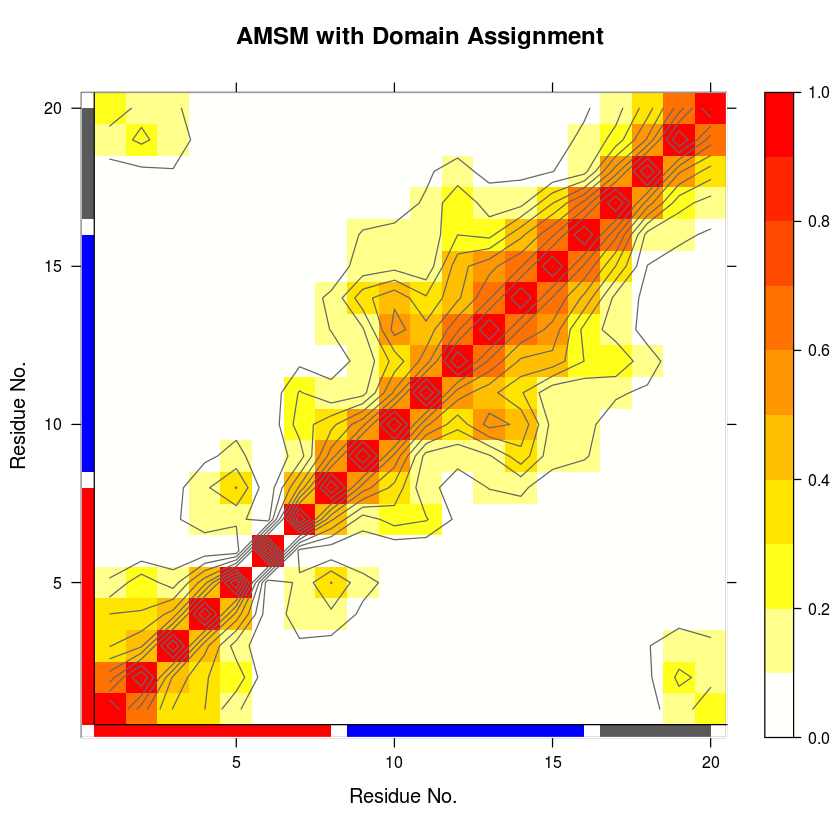

In [51]:
# Fit all frames to the 'first' domain
domain.inds <- gs$inds[[1]]

xyz <- pdbfit(pdb, inds=domain.inds)

# write fitted coordinates
write.pdb(pdb, xyz=xyz, chain=gs$atomgrps, file="1d1d_fit-domain1.pdb")

# plot geostas results
plot(gs)

In [44]:
# Invariant core
core <- core.find(pdb)

# fit to core region
xyz <- pdbfit(pdb, inds=core)

# write fitted coordinates
write.pdb(pdb, xyz=xyz, file="1d1d_fit-core.pdb")


 ..       20 atom(s) from 'string' selection 
 ..       20 atom(s) in final combined selection 


 ..        0 atom(s) from 'string' selection 
 ..        0 atom(s) from 'elety' selection 
 ..        0 atom(s) in final combined selection 

 Union of selects
 *  Selected a total of: 20 atoms  *
 core size 19 of 20  vol = 0.7 
 core size 18 of 20  vol = 0.253 
 FINISHED: Min vol ( 0.5 ) reached


In [45]:
# Download some example PDB files
ids <- c("1TND_B","1AGR_A","1FQJ_A","1TAG_A","1GG2_A","1KJY_A")
raw.files <- get.pdb(ids)

In [50]:
# Extract and align the chains we are interested in
# Need muscle http://www.drive5.com/muscle/downloads.htm
pdbs <- pdbsplit(raw.files, ids)
pdbs <- pdbaln(files)

  |======================================================================| 100%
Reading PDB files:
split_chain/1TND_B.pdb
split_chain/1AGR_A.pdb
split_chain/1FQJ_A.pdb
split_chain/1TAG_A.pdb
split_chain/1GG2_A.pdb
split_chain/1KJY_A.pdb
......

Extracting sequences


ERROR: Error in seqaln(s, id = files, ...): Launching external program failed
  make sure 'muscle' is in your search path


In [48]:
## Calculate RMSD
rmsd(pdbs, fit=TRUE)

ERROR: Error in rmsd(pdbs, fit = TRUE): No comparison can be made, input was only a single vector 'a'
